In [2]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import MDBN

Using gpu device 0: GeForce GTX 1070 (CNMeM is enabled with initial size: 75.0% of memory, cuDNN 5005)


In [3]:
import AMLsm
me_DBN, ge_DBN, sm_DBN, dm_DBN, top_DBN = AMLsm.load_network('Run_2016-12-21_0822/Exp_2016-12-21_0822_run_0.npz','../MDBN_run')

Adding a layer with 559 input and 40 outputs
Adding a layer with 19937 input and 400 outputs
Adding a layer with 400 input and 40 outputs
Adding a layer with 1686 input and 40 outputs
Adding a layer with 120 input and 24 outputs
Adding a layer with 24 input and 3 outputs


In [4]:
datafiles = AMLsm.prepare_AML_TCGA_datafiles('../data')

In [5]:
ME_output, _ = me_DBN.MLP_output_from_datafile(datafiles['ME'], datadir='../data')
GE_output, _ = ge_DBN.MLP_output_from_datafile(datafiles['GE'], datadir='../data')
SM_output, _ = sm_DBN.MLP_output_from_datafile(datafiles['SM'], datadir='../data')

(-0.5, 119.5, 169.5, -0.5)

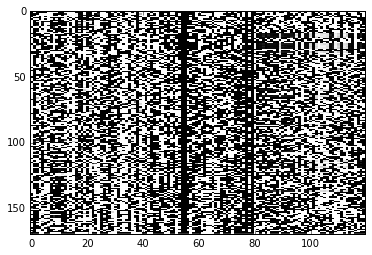

In [6]:
joint_layer = np.concatenate([ME_output, GE_output, SM_output],axis=1)
plt.imshow(joint_layer, cmap='gray',interpolation='none')
plt.axis('tight')

([<matplotlib.axis.XTick at 0x7f0677999850>,
 <a list of 3 Text xticklabel objects>)

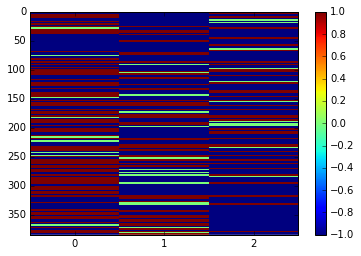

In [7]:
top_output = top_DBN.get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x7f06779b7b50>,
 <a list of 3 Text xticklabel objects>)

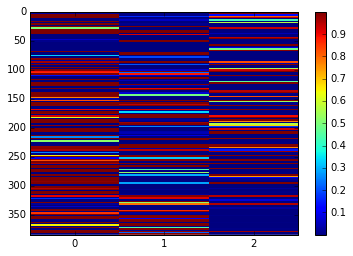

In [8]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0])
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 76.,   2.,   2.,   1.,   0.,   2.,   3.,   1.,   5.,  78.]),
  array([ 101.,    3.,    6.,    2.,    3.,    2.,    0.,    1.,    2.,   50.]),
  array([ 115.,    4.,    0.,    0.,    3.,    4.,    1.,    3.,    4.,   36.])],
 array([  4.84526641e-09,   9.99999686e-02,   1.99999932e-01,
          2.99999896e-01,   3.99999860e-01,   4.99999824e-01,
          5.99999787e-01,   6.99999751e-01,   7.99999715e-01,
          8.99999679e-01,   9.99999642e-01]),
 <a list of 3 Lists of Patches objects>)

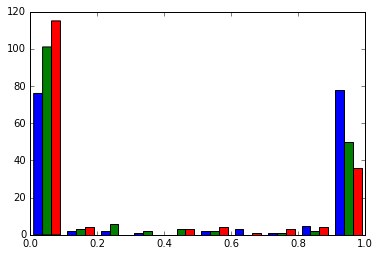

In [9]:
plt.hist(top_output)

(array([ 115.,    4.,    0.,    0.,    3.,    4.,    1.,    3.,    4.,   36.]),
 array([  9.76478987e-09,   9.99987809e-02,   1.99997552e-01,
          2.99996323e-01,   3.99995094e-01,   4.99993866e-01,
          5.99992637e-01,   6.99991408e-01,   7.99990179e-01,
          8.99988950e-01,   9.99987721e-01]),
 <a list of 10 Patch objects>)

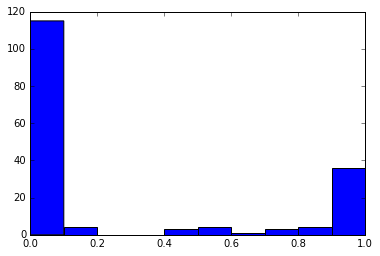

In [12]:
plt.hist(top_output[:,2])

In [10]:
code = (top_output[:,0:2] > 0.5) * np.ones_like(top_output[:,0:2])

In [11]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

In [12]:
cl

array([ 1.,  0.,  2.,  2.,  2.,  0.,  0.,  2.,  0.,  2.,  0.,  3.,  2.,
        2.,  3.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  2.,  2.,  0.,  3.,
        0.,  2.,  0.,  2.,  0.,  2.,  3.,  2.,  3.,  0.,  0.,  1.,  2.,
        0.,  0.,  2.,  3.,  2.,  0.,  3.,  1.,  0.,  2.,  2.,  2.,  2.,
        2.,  0.,  3.,  0.,  3.,  3.,  3.,  0.,  0.,  3.,  0.,  2.,  2.,
        1.,  3.,  3.,  0.,  2.,  2.,  3.,  1.,  2.,  0.,  0.,  2.,  2.,
        2.,  0.,  0.,  2.,  0.,  3.,  1.,  2.,  0.,  0.,  1.,  3.,  3.,
        2.,  3.,  0.,  0.,  0.,  3.,  3.,  0.,  3.,  3.,  2.,  3.,  0.,
        3.,  2.,  0.,  2.,  2.,  1.,  0.,  2.,  0.,  2.,  2.,  2.,  2.,
        2.,  0.,  0.,  2.,  2.,  2.,  0.,  2.,  2.,  0.,  3.,  1.,  1.,
        0.,  1.,  3.,  1.,  0.,  0.,  0.,  2.,  3.,  1.,  2.,  2.,  1.,
        3.,  2.,  1.,  1.,  2.,  1.,  3.,  0.,  2.,  1.,  2.,  3.,  2.,  1.])

(array([ 58.,  23.,  57.,  32.]),
 array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ]),
 <a list of 4 Patch objects>)

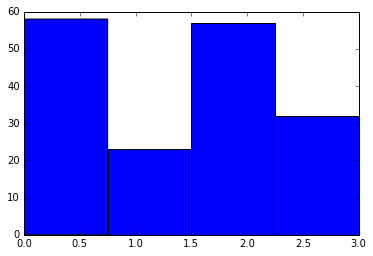

In [13]:
plt.hist(cl,bins=4)

Check Survival curves for the different classes
===============================================

In [14]:
import csv
id=[]
with open('../data/'+datafiles['ME']) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [15]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [16]:
import re
time_list = []
event_list = []
group_list = []
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(1)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(0)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


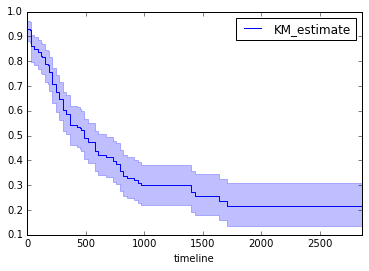

In [17]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

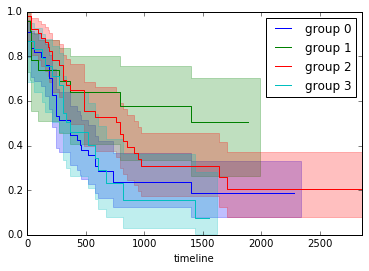

In [18]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in range(1,4):
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)